In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from utils import Triangle, minkowski_sum, Vorobyev_sim, ODA_sim, rotation

In [3]:
# zadefinovanie pozicie jednotlivych trojuholnikov
polygons = [Triangle(3, angle) for angle in np.pi * np.array([-1 / 3, -1 / 2, -2 / 3, -5 / 6])]

# pravdepodobnosti
probs_unif = [0.25, 0.25, 0.25, 0.25]
probs_2224 = [0.2, 0.2, 0.2, 0.4]
probs_1117 = [0.1, 0.1, 0.1, 0.7]

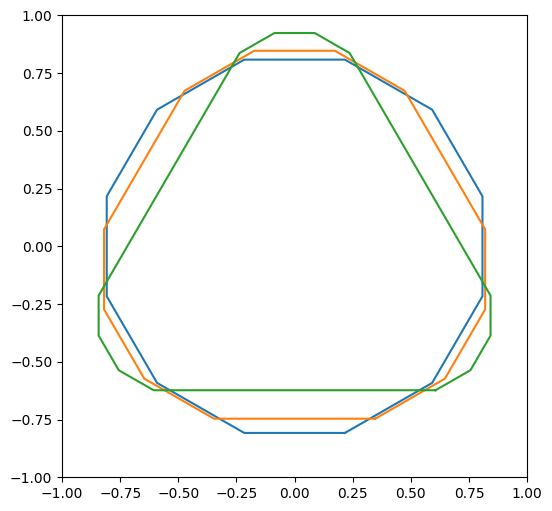

In [9]:
# vypocet aumannovej strednej hodnoty
aumann_unif = minkowski_sum(polygons=[poly.points for poly in polygons], probs=probs_unif)
aumann_2224 = minkowski_sum(polygons=[poly.points for poly in polygons], probs=probs_2224)
aumann_1117 = minkowski_sum(polygons=[poly.points for poly in polygons], probs=probs_1117)

plt.figure(figsize=(6,6))
plt.plot(aumann_unif[:,0], aumann_unif[:,1])
plt.plot(aumann_2224[:,0], aumann_2224[:,1])
plt.plot(aumann_1117[:,0], aumann_1117[:,1])
plt.setp(plt.gca(), xlim=(-1,1), ylim=(-1,1))
plt.show()

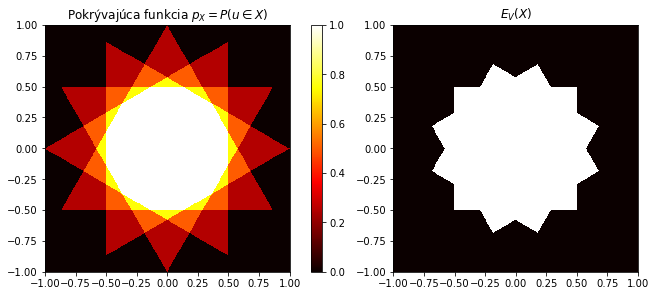

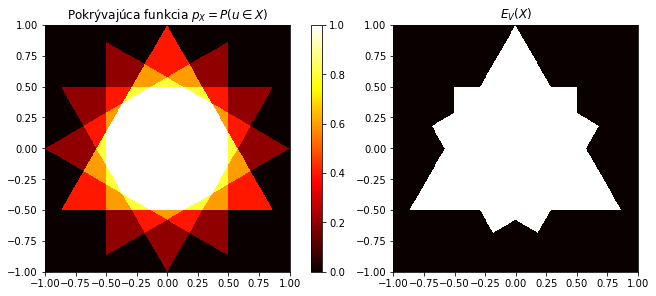

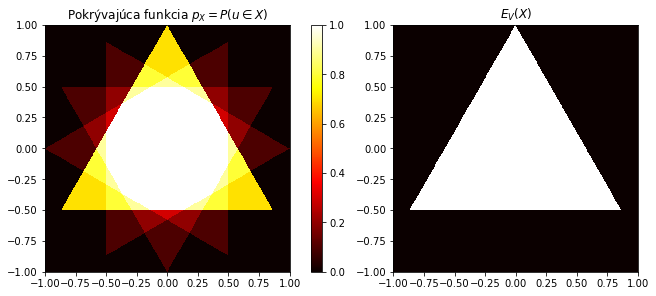

In [9]:
# vypocet Vorobyevovej strednej hodnoty (diskretizacia na mriezke s rozlisenim 500x500)
# POZOR, trva 3.5 minuty
for i,probs in enumerate([probs_unif,probs_2224,probs_1117]):
    Vorobyev_sim(polygons, probs, 500, 500, (-1,1), (-1,1))

In [6]:
# definovanie hranice Vorobyevovej strednej hodnoty
# rucne, na zaklade vysledkov z predoslej bunky
# potrebne pre vykreslenie vystupu na konci notebooku

pts_ = [(0.577350,0), (0.683013,0.183013)]
pts = pts_ + [rotation(pt[0],pt[1],np.pi/6) for pt in pts_]
for i in range(2,12):
    pts = pts + [rotation(pt[0],pt[1],i*np.pi/6) for pt in pts_]
vorobyev_unif = np.array(pts + [pts[0]])

pts_ = [(np.cos(-np.pi/6),np.sin(-np.pi/6)), (np.cos(np.pi/2),np.sin(np.pi/2)), (np.cos(-5*np.pi/6),np.sin(-5*np.pi/6))]
vorobyev_1117 = np.array(pts_ + [pts_[0]])

pts_ = [(np.cos(-np.pi/6),np.sin(-np.pi/6)), (0.577350,0), (0.683013,0.183013), (0.5,0.288675), (0.5,0.288675), (0.5,0.5), (0.288675,0.5)]
pts = pts_ + [rotation(pt[0],pt[1],2*np.pi/3) for pt in pts_]
pts = pts + [rotation(pt[0],pt[1],4*np.pi/3) for pt in pts_]
vorobyev_2224 = np.array(pts + [pts[0]])

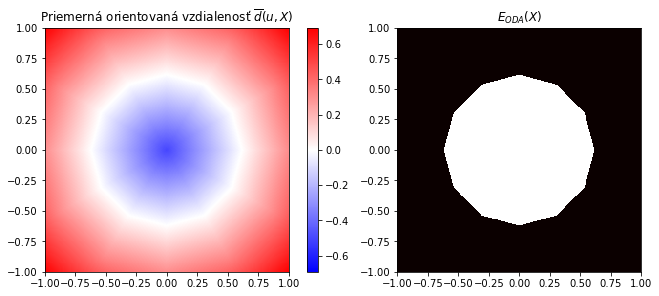

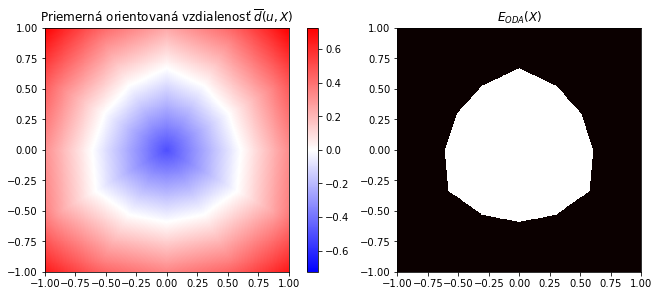

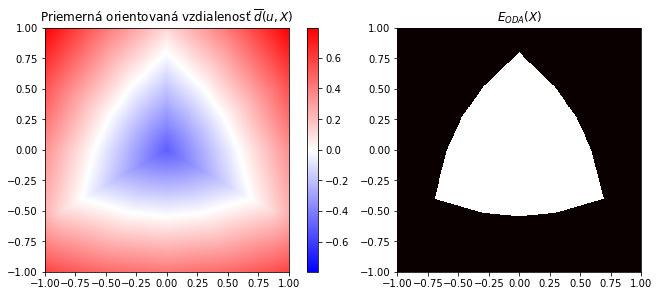

In [12]:
# vypocet ODA
# POZOR, trva 5.5 minut
for i,probs in enumerate([probs_unif,probs_2224,probs_1117]):
    ODA_sim(polygons, probs, 500, 500, (-1,1), (-1,1))

In [7]:
# definovanie hranice ODA strednej hodnoty
# na zaklade rucneho analytickeho vypoctu (nacrtnuteho aj v praci)
# potrebne pre vykreslenie vystupu na konci notebooku
def ODA_poly_points(p):
    pts_ = [(1/(2*p[0]+np.sqrt(3)*p[1]+p[2]+np.sqrt(3)*p[3]),0),
            p[1]/(6*p[0]*p[1]+2*np.sqrt(3)*p[1]**2+6*p[1]*p[2]+4*np.sqrt(3)*p[1]*p[3]) * np.array([3,np.sqrt(3)]),
            p[0]/(6*p[0]*p[1]+2*np.sqrt(3)*p[0]**2+6*p[0]*p[3]+4*np.sqrt(3)*p[0]*p[2]) * np.array([np.sqrt(3),3]),
            p[3]/(6*p[0]*p[3]+2*np.sqrt(3)*p[3]**2+6*p[2]*p[3]+4*np.sqrt(3)*p[1]*p[3]) * np.array([0,2*np.sqrt(3)])]
    pts = pts_ + [rotation(pt[0],pt[1],2*np.pi/3) for pt in pts_]
    pts = pts + [rotation(pt[0],pt[1],4*np.pi/3) for pt in pts_]
    return np.array(pts + [pts[0]])

oda_unif = ODA_poly_points(probs_unif)
oda_2224 = ODA_poly_points(probs_2224)
oda_1117 = ODA_poly_points(probs_1117)

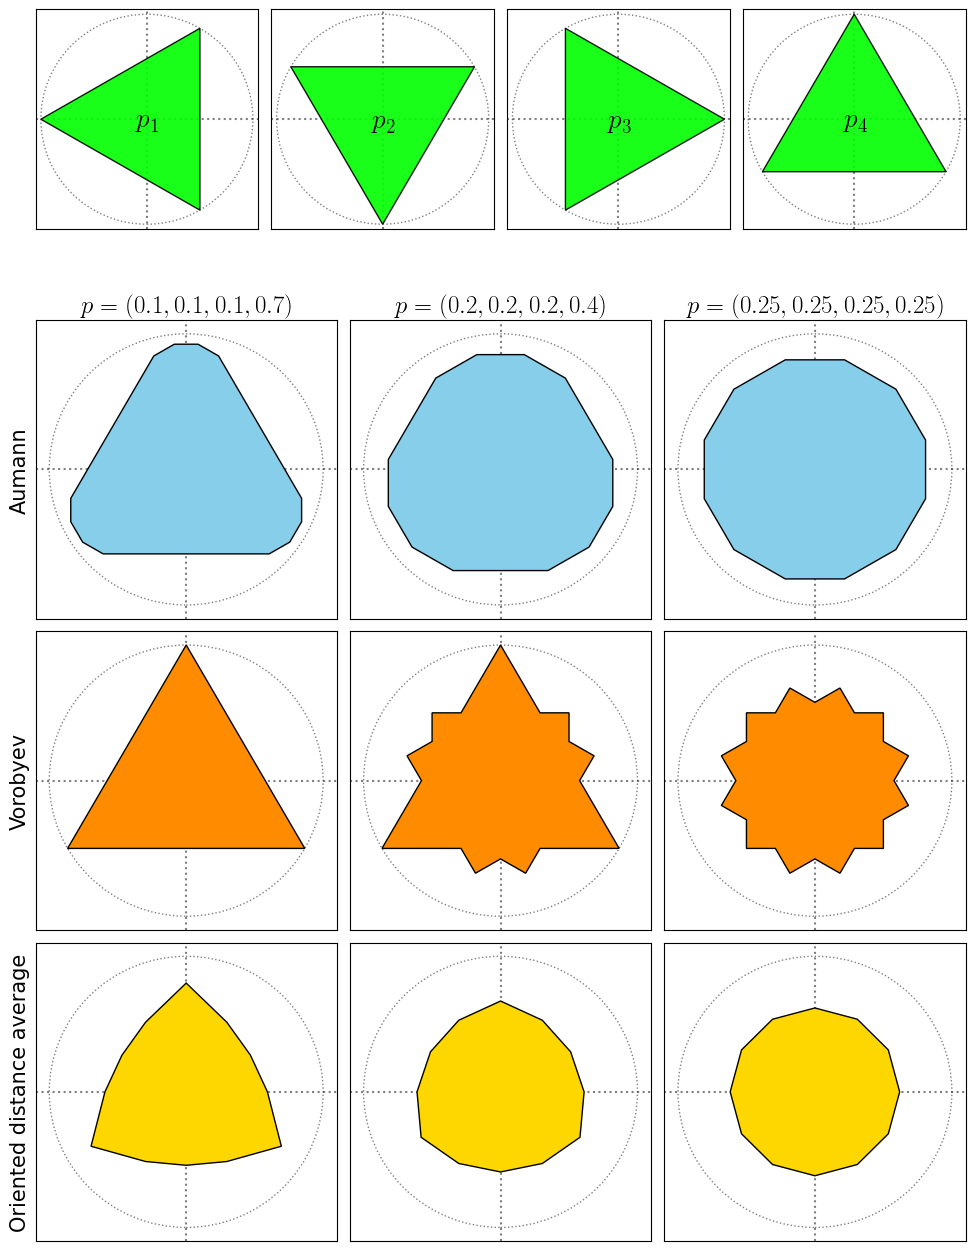

In [10]:
# porovnanie vsetkych strednych hodnot na jednom obrazku

fig = plt.figure(figsize=(12,16))

prob_texts = ["$p_1$","$p_2$","$p_3$","$p_4$"]
for i in range(4):
    fig.add_subplot(16,12,(3*i+1,3*i+27))
    plt.setp(plt.gca(), xlim=(-1.05,1.05), ylim=(-1.05,1.05), xticks=[], yticks=[])
    plt.gca().add_patch(ptch.Polygon(polygons[i].points, fc="lime", ec="black", alpha=0.9))
    plt.gca().add_patch(ptch.Circle([0,0], 1, fill=False, ec="black", zorder=0, ls=":", alpha=0.5))
    plt.gca().text(0,0,f"{prob_texts[i]}", va="center", ha="center", usetex=True, fontsize=20)
    plt.gca().axhline(zorder=0, color="black", alpha=0.5, ls=":")
    plt.gca().axvline(zorder=0, color="black", alpha=0.5, ls=":")

expectations = [[aumann_1117, aumann_2224, aumann_unif], [vorobyev_1117,vorobyev_2224, vorobyev_unif], [oda_1117, oda_2224, oda_unif]]
colors = ["skyblue", "darkorange", "gold"]
names = ["Aumann", "Vorobyev", "Oriented distance average"]
probs_text = ["$p=(0.1, 0.1, 0.1, 0.7)$", "$p=(0.2, 0.2, 0.2, 0.4)$", "$p=(0.25, 0.25, 0.25, 0.25)$"]
for exp in range(3):
    for var in range(3):
        fig.add_subplot(16,12,(48+48*exp+var*4+1,48+48*exp+36+var*4+4))
        plt.setp(plt.gca(), xlim=(-1.1,1.1), ylim=(-1.1,1.1), xticks=[], yticks=[])

        plt.gca().add_patch(ptch.Polygon(expectations[exp][var], fc=colors[exp], ec="black"))
        plt.gca().add_patch(ptch.Circle([0,0], 1, fill=False, ec="black", zorder=0, ls=":", alpha=0.5))
        plt.gca().axhline(zorder=0, color="black", alpha=0.5, ls=":")
        plt.gca().axvline(zorder=0, color="black", alpha=0.5, ls=":")

        if var==0:
            plt.gca().set_ylabel(names[exp], fontsize=15)
        if exp==0:
            plt.gca().set_title(probs_text[var], fontsize=18, usetex=True)

plt.show()